In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
df = pd.read_csv('boston_housing.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


## Data Description

- crim :
    per capita crime rate by town.

- zn :
    proportion of residential land zoned for lots over 25,000 sq.ft.

- indus :
    proportion of non-retail business acres per town.

- chas :
    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- nox :
    nitrogen oxides concentration (parts per 10 million).

- rm :
    average number of rooms per dwelling.

- age :
    proportion of owner-occupied units built prior to 1940.

- dis :
    weighted mean of distances to five Boston employment centres.

- rad :
    index of accessibility to radial highways.

- tax :
    full-value property-tax rate per \$10,000.

- ptratio :
    pupil-teacher ratio by town.

- black :
    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- lstat :
    lower status of the population (percent).

- medv :
    median value of owner-occupied homes in \$1000s.



In [3]:
display(df.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
display(df.tail())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
print('Number of duplicated data :')
print(df.duplicated().sum())

Number of duplicated data :
0


## Exploratory Data Analysis

In [6]:
statistics_ = df.describe()
display(statistics_)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
kurt_ = df.kurtosis()
skew_ = df.skew(axis=0)

In [22]:
display(kurt_)

crim       37.130509
zn          4.031510
indus      -1.233540
chas        9.638264
nox        -0.064667
rm          1.891500
age        -0.967716
dis         0.487941
rad        -0.867232
tax        -1.142408
ptratio    -0.285091
b           7.226818
lstat       0.493240
medv        1.495197
dtype: float64

In [27]:
display(skew_)

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

In [7]:
df.columns.values[:9]

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad'],
      dtype=object)

In [16]:
from scipy import stats

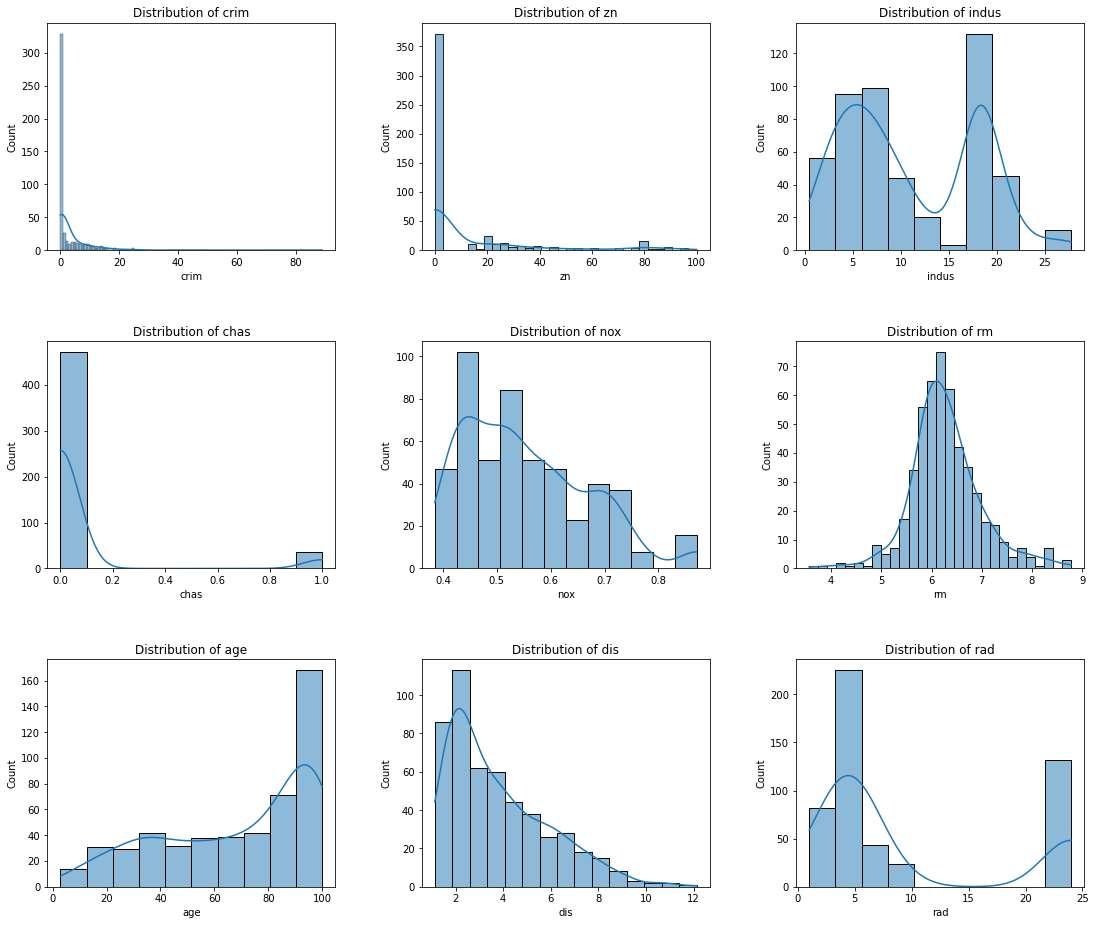

In [12]:
fig, ax = plt.subplots(3,3, figsize = (18,15))
columns_ = df.columns.values[:9]
columns_val = 0
for row in range(3):
    for col in range(3):
        sns.histplot(x = columns_[columns_val], data = df,kde=True, ax = ax[row,col])
        ax[row,col].set_title(f'Distribution of {columns_[columns_val]}')
        skew_ = stats.skew(df[columns_[columns_val]])
        kurt- = stats.kurtosis(df[columns_[columns_val]])
        ax[row,col].
        columns_val += 1
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()
    

In [13]:
print(df.columns.values[9:-1])

['tax' 'ptratio' 'b' 'lstat']


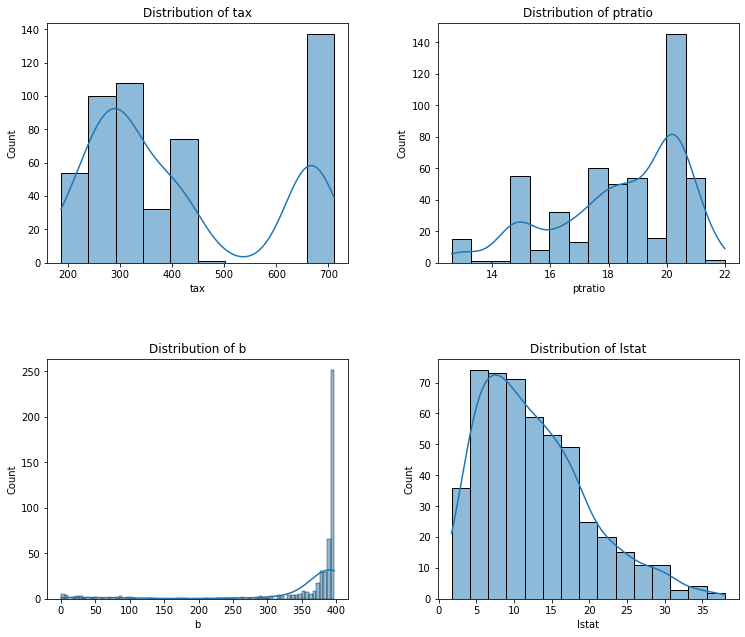

In [15]:
fig, ax = plt.subplots(2,2, figsize = (12,10))
columns_ = df.columns.values[9:-1]
columns_val = 0
for row in range(2):
    for col in range(2):
        sns.histplot(x = columns_[columns_val], data = df,kde=True, ax = ax[row,col])
        ax[row,col].set_title(f'Distribution of {columns_[columns_val]}')
        columns_val += 1
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()

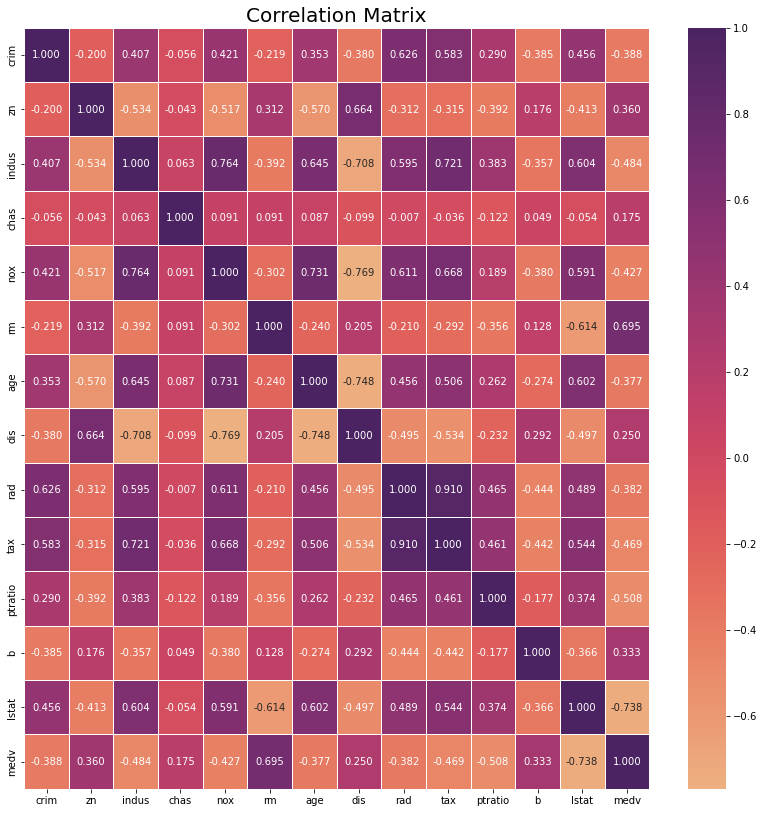

In [8]:
corr = df.corr()
fig,ax = plt.subplots(figsize = (14,14))
sns.heatmap(corr, linewidths = 0.5,fmt = '.3f',cmap='flare',annot = True, ax = ax)
ax.set_title('Correlation Matrix', fontsize = 20)
plt.show()

In [9]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


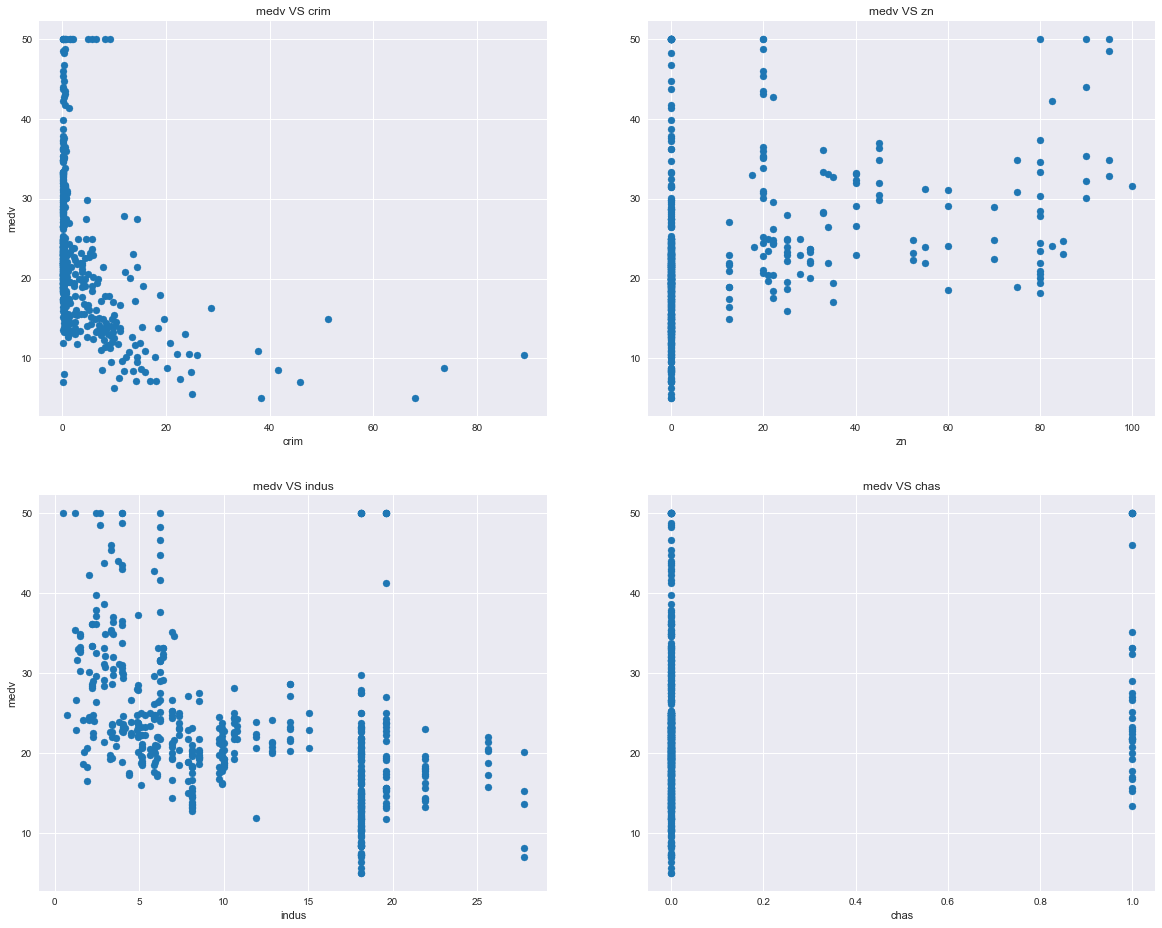

In [10]:
plt.style.use('seaborn')
columns_ = ['crim', 'zn', 'indus', 'chas']
fig, ax = plt.subplots(2,2, figsize = (20,16))
columns_val = 0
for row in range(2):
    for col in range(2):
        ax[row,col].scatter(x = df[columns_[columns_val]], y = df['medv'], color = 'tab:blue')
        ax[row,col].set_xlabel(columns_[columns_val])
        ax[row,col].set_title('medv' + ' VS ' +  columns_[columns_val])
        columns_val += 1
    ax[row,0].set_ylabel('medv')
plt.show()

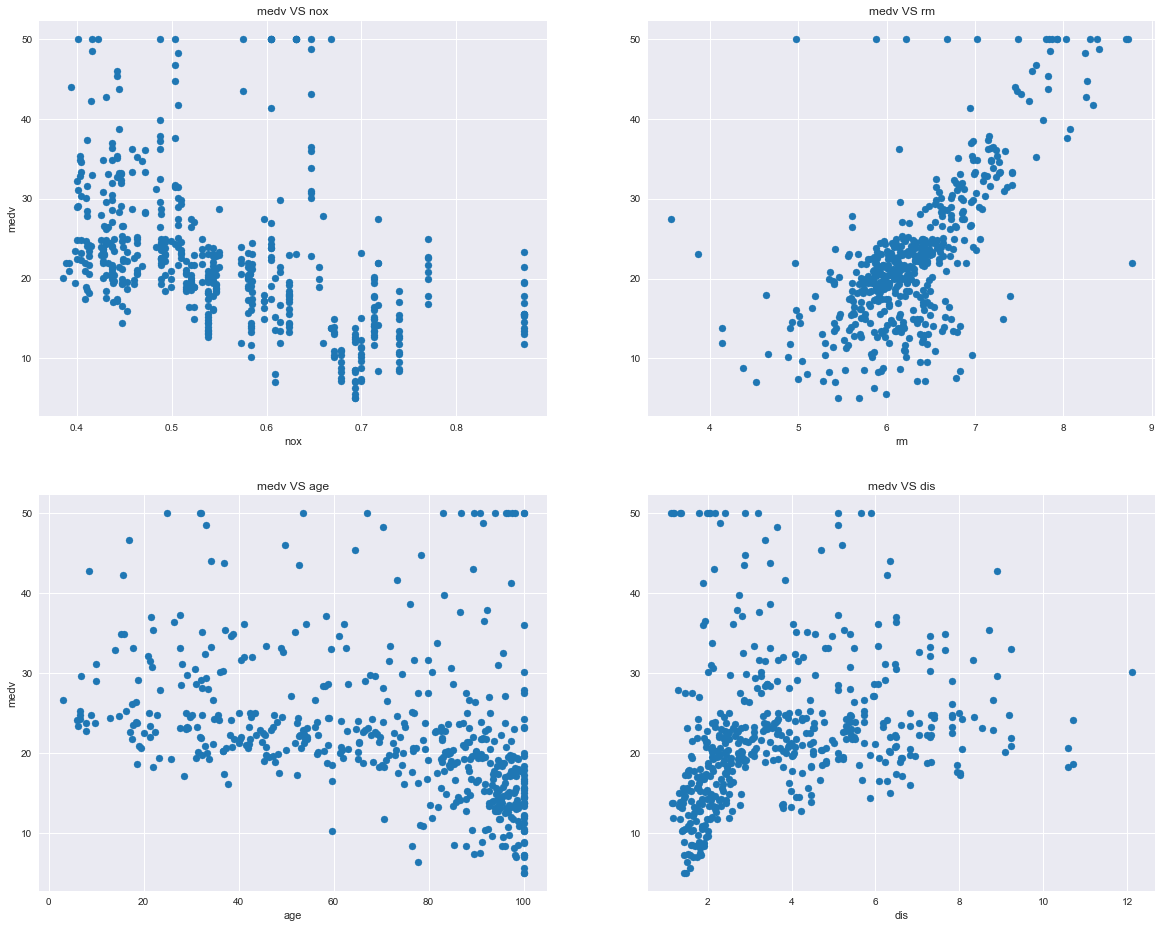

In [12]:
columns_ = ['nox', 'rm', 'age', 'dis']
fig, ax = plt.subplots(2,2, figsize = (20,16))
columns_val = 0
for row in range(2):
    for col in range(2):
        ax[row,col].scatter(x = df[columns_[columns_val]], y = df['medv'], color = 'tab:blue')
        ax[row,col].set_xlabel(columns_[columns_val])
        ax[row,col].set_title('medv' + ' VS ' +  columns_[columns_val])
        columns_val += 1
    ax[row,0].set_ylabel('medv')
plt.show()

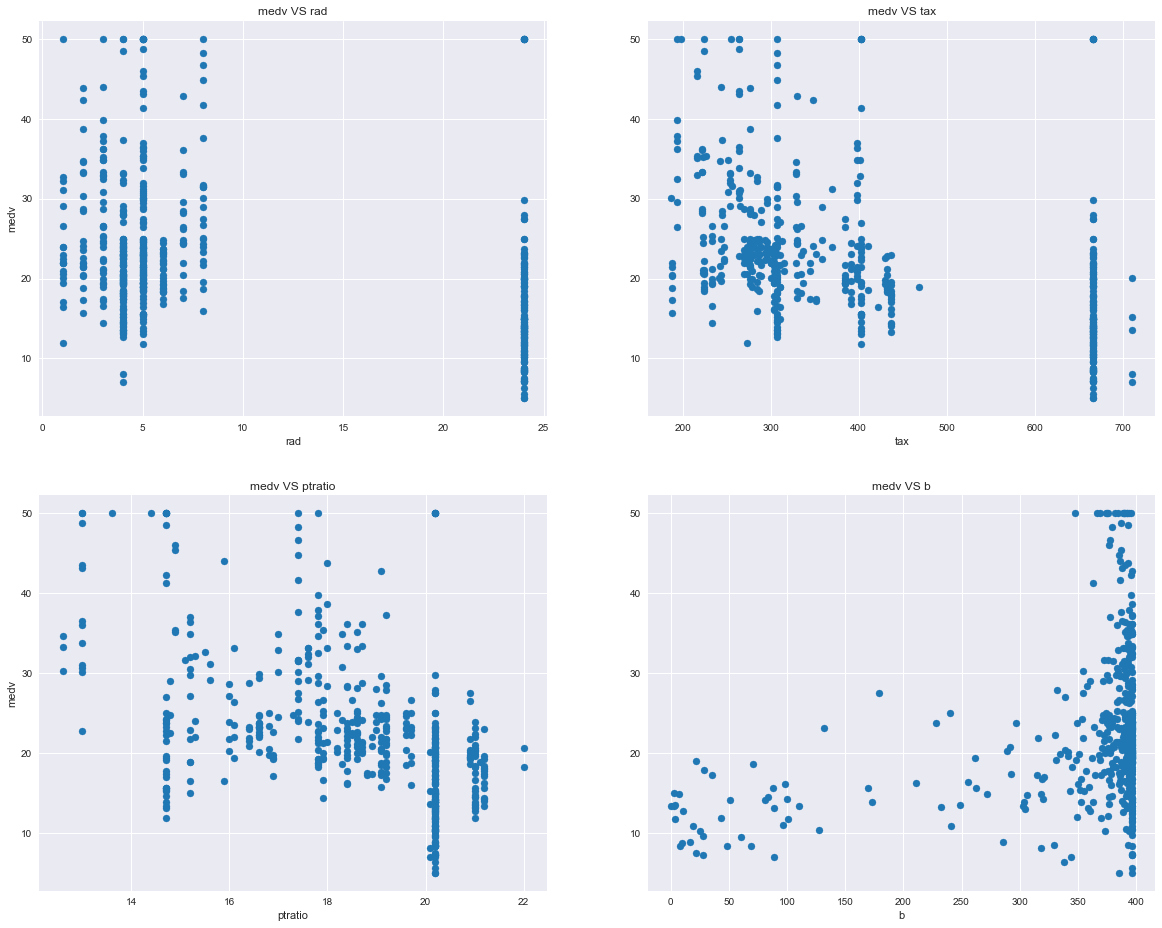

In [13]:

columns_ = ['rad', 'tax','ptratio', 'b']
fig, ax = plt.subplots(2,2, figsize = (20,16))
columns_val = 0
for row in range(2):
    for col in range(2):
        ax[row,col].scatter(x = df[columns_[columns_val]], y = df['medv'], color = 'tab:blue')
        ax[row,col].set_xlabel(columns_[columns_val])
        ax[row,col].set_title('medv' + ' VS ' +  columns_[columns_val])
        columns_val += 1
    ax[row,0].set_ylabel('medv')
plt.show()

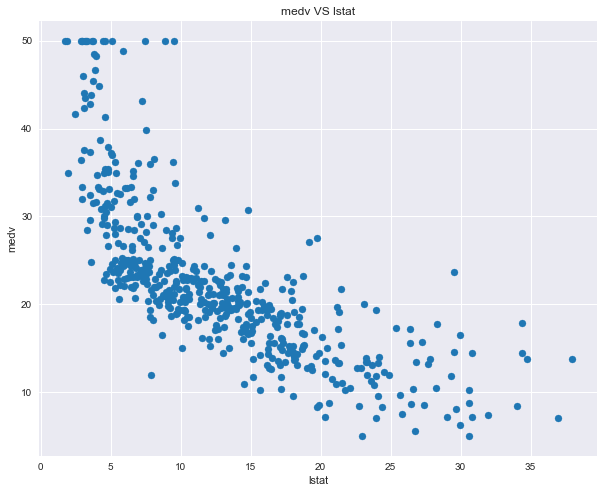

In [14]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x = df['lstat'], y = df['medv'], color = 'tab:blue')
ax.set_xlabel('lstat')
ax.set_title('medv' + ' VS ' +  'lstat')
ax.set_ylabel('medv')
plt.show()

In [15]:
X = df.drop('medv', axis = 1)
Y = df[['medv']]

print('Independent Variables :')
display(X.head())
print('-'*25)
print('Dependent Variable :')
display(Y.head())


Independent Variables :


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


-------------------------
Dependent Variable :


,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25 ,random_state=  43)
print(f'Row x_train : {X_train.shape[0]} & y_train : {Y_train.shape[0]}')
print(f'Row x_test : {X_test.shape[0]} & y_test : {Y_test.shape[0]}')

Row x_train : 379 & y_train : 379
Row x_test : 127 & y_test : 127


In [17]:
std = StandardScaler()
X_train[X.columns.values] = std.fit_transform(X_train)
X_test[X.columns.values] = std.fit_transform(X_test)

In [18]:
display(X_train[X_train.columns.values].head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
193,-0.416248,2.013625,-1.168321,-0.260011,-1.306884,0.706264,-2.002135,1.156418,-0.956455,-0.834867,-1.264381,0.389052,-1.073173
405,8.452737,-0.505206,1.097391,-0.260011,1.278726,-0.936250,1.151549,-1.184437,1.707256,1.589464,0.831181,0.292984,1.695321
177,-0.412018,-0.505206,-1.001044,-0.260011,-0.341708,-0.006914,0.220494,-0.260585,-0.493201,-0.647450,-0.808824,0.414555,-0.878839
191,-0.410077,1.383917,-1.092150,-0.260011,-0.988110,0.616565,-1.270593,1.283465,-0.493201,-0.030787,-1.446604,0.347194,-1.125613
471,0.108394,-0.505206,1.097391,-0.260011,-0.146901,-0.133374,0.826030,-0.367125,1.707256,1.589464,0.831181,0.411468,0.136019


In [19]:
display(X_test[X_test.columns.values].head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
360,-0.025857,-0.434523,0.809633,-0.307941,1.615153,0.289211,0.572402,-0.492341,1.538177,1.377097,0.736255,0.255713,-0.806619
391,0.043485,-0.434523,0.809633,-0.307941,1.041491,-0.171105,0.362873,-0.647863,1.538177,1.377097,0.736255,0.293462,0.485624
247,-0.427004,0.586551,-0.894184,-0.307941,-1.163012,0.061043,0.237156,1.965333,-0.386997,-0.531676,0.198311,0.271326,-0.528616
57,-0.443828,4.206725,-1.526156,-0.307941,-1.326915,0.843713,-1.237164,2.084859,-0.613488,-0.952061,-1.757847,0.436945,-1.258962
244,-0.426126,0.586551,-0.894184,-0.307941,-1.163012,-0.778670,0.134296,1.920683,-0.386997,-0.531676,0.198311,0.235258,-0.251791


In [20]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
score = lr.score(X_train,Y_train)
y_pred = lr.predict(X_test)
r2 = lr.score(X_train,Y_train)
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))


print('R-Squared Score for model :')
print(r2)
print('MAE score :')
print(mae)
print('MSE score :')
print(mse)
print('RMSE score :')
print(rmse)

R-Squared Score for model :
0.74914242913834
MAE score :
4.103915264605802
MSE score :
26.822221670405764
RMSE score :
5.17901744256628


## Model Assessment

In [21]:
import statsmodels.api as sm
X_train_copy = X_train.copy()
Y_train_copy = Y_train.copy()
X_train_copy = sm.add_constant(X_train_copy)
model = sm.OLS(Y_train_copy, X_train_copy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     83.85
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          5.37e-101
Time:                        05:39:31   Log-Likelihood:                -1115.0
No. Observations:                 379   AIC:                             2258.
Df Residuals:                     365   BIC:                             2313.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9319      0.240     95.534      0.0

From the table above, we can see the p-value for the model is < 0.05 which is significant. So, we reject null hypothesis and indicates at least one parameter has a significant contribution to model. Furthermore, we can see which parameters from all the independen variable are significant from zero by seeing each of paramater's p-value.

## Model Diagnostics.
# In linear Regression there are 5 assumptions to be satisfied :

1. There's linear relationship between independent variables and dependent variabel.
2. There's no multicollinearity among independent variables.
3. Homosedacity or constant variance.
4. Normality of residuals.
5. Independet residuals.

##  First assumption : Linear Relationship

In simple linear regression, we need to check whether the independent and dependend variable are linearly correlated. The easy way to check it is by plotting the independent variable against the dependent variabel. However, in multiple linear regression there are many indepedent variables. to check linear relationship between the independent and dependent variables, we need to plot every independent variables against the dependent variable in assumption that there's no multicollinearity among the independent variables. From  the previous plots of the independent variables against the dependent variable, we can see that not all independent variables are lineary correlated to the dependent variable. to fix this problem, we need to do a transformation on the independent variables first. So, we can say the first assumption is violated.

## Second assumption : Multicollinearity

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop('medv', axis = 1).values
columns = df.drop('medv', axis = 1).columns
vif = [variance_inflation_factor(X, i) for i in range(df.shape[1]-1)]
vif_df = pd.DataFrame({'VIF' : vif}, index = columns)
display(vif_df)

,VIF
crim,2.100373
zn,2.844013
indus,14.485758
chas,1.152952
nox,73.894947
rm,77.948283
age,21.386850
dis,14.699652
rad,15.167725
tax,61.227274


We can check multicollinearity by using VIF (commonly used). for value that is above the following thresholds, we can remove it from the data
- "10" as the maximum level of VIF (Hair et al., 1995)
- "5" as the maximum level of VIF (Ringle et al., 2015)

## Third assumption : homoscedasticity

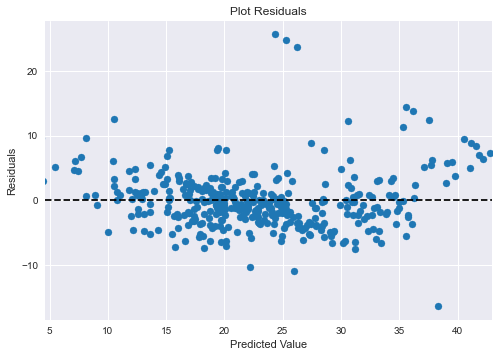

In [27]:
y_pred_model = lr.predict(X_train)
residuals = Y_train-y_pred_model
fig, ax = plt.subplots()
ax.scatter(x = y_pred_model, y = residuals, color = 'tab:blue')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Residuals')
ax.set_title('Plot Residuals')
ax.set_xlim(y_pred.min()-1,y_pred.max()+1)
ax.hlines(0,y_pred.min()-1,y_pred.max()+1, linestyles= 'dashed', color = 'black')
plt.show()

from the plot above, we can see the residuals are not scattered randomly across the horizontal line and the variance of the residuals is not constant. So, we can say the third assumption is violated

## Fourth assumption : Normality of Residuals

In [28]:
from scipy import stats
kstest_ = stats.kstest(residuals, 'norm') # Test Statistics for normality
shapiro_wilks_ = stats.shapiro(residuals) # another alternative test statistics for normality
print('KS test :')
print(kstest_)
print('Shapiro test :')
print(shapiro_wilks_)

KS test :
KstestResult(statistic=1.0, pvalue=0.0)
Shapiro test :
ShapiroResult(statistic=0.9010220766067505, pvalue=5.3823662547584656e-15)


Because both tests lead to significant results, so with 0.05 alpha we reject the null hypothesis that data is distributed normaly. So, we can say the fourth assumption is violated

## Fifth assumption : independent of Residuals

In [29]:
# test statistics for checking autocorrelation of residuals
from statsmodels.stats.stattools import durbin_watson 
durbin_test = durbin_watson(residuals)
print(durbin_test)

[2.04405051]


The followings are rules of durbin watson test for autocorrelation :
1. if the test statistics lay below < 1.5 : There is positive correlation
2. if the test statistics lay between 1.5 - 2. 5 : There is no correlation
3. if the test statistics lay above > 2.5 : Theres is negative correlation

from the result above, we can conclude there is no correlation among the residuals.So, we can say the fifth assumption is satisfied